### Solving non-linear problems using a kernel SVM

**Kernel methods** create nonlinear combinations of the original features to project them into a higher-dimensional space via a mapping $\phi$ where it becomes linearly seperable. 

**Kernel function**: $\kappa \left( x^{(i)}, x^{(j)} \right) = \phi\left(x^{(i)}\right)^{T} \phi\left(x^{(j)}\right) $ 

One of the most widely used kernels is the Gaussian kernel: $\kappa \left( x^{(i)}, x^{(j)} \right) = exp\left( -\gamma || x^{(i)} - x^{(j)} ||^2 \right)$

**Kernel** can be interpretted as a similarity measure: 1 if similar, 0 if very dissimilar.

Important parameters to vary:

* C is inversely proportional to the size of the boundary
* $\gamma$ Cut-off parameter for the gaussian sphere, higher value means tighter and bumpier boundary

In [1]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

### Basic pipeline

#### Collect data

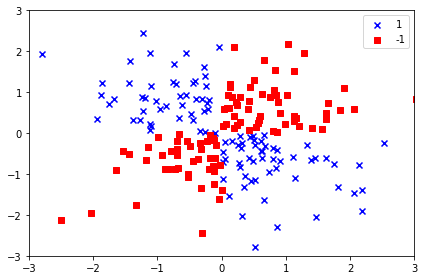

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Train an algorithm

In [3]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

#### Visualize decision boundaries

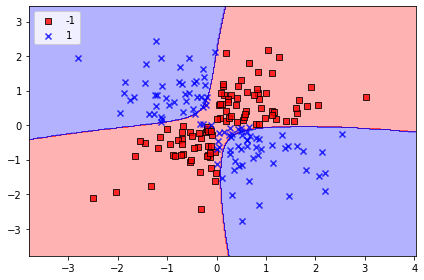

In [5]:
import matplotlib.pyplot as plt
from helper.plotter import plot_decision_regions

plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()